# Practical 3: Multivariate Linear Regression with KPI
---
**ID:** 17CE023<br>
**Author:** Bhishm Daslaniya<br>

---
**Instructions:** <br>

Task 2: UNDERSTAND AND IMPLEMENT VARIOUS REGRESSION KPIs (Key Performance Indicator)
1. Mean absolute error (MAE)
2. Mean squared error (MSE)
3. Root mean square error (RMSE)
4. R**2
5. Adjusted R**2

<br>Note: See task 10 for KPI implementation

---

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

![image.png](img/Task1.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [ ]:
# !pip install jupyterthemes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot # !pip install jupyterthemes
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
# read the csv file 
admission_df=pd.read_csv('Admission_Predict.csv')

In [5]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Let's drop the serial no.
admission_df.drop('Serial No.',axis=1,inplace=True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Grouping by University ranking 
df_university=admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd703d71f98>,
      dtype=object)

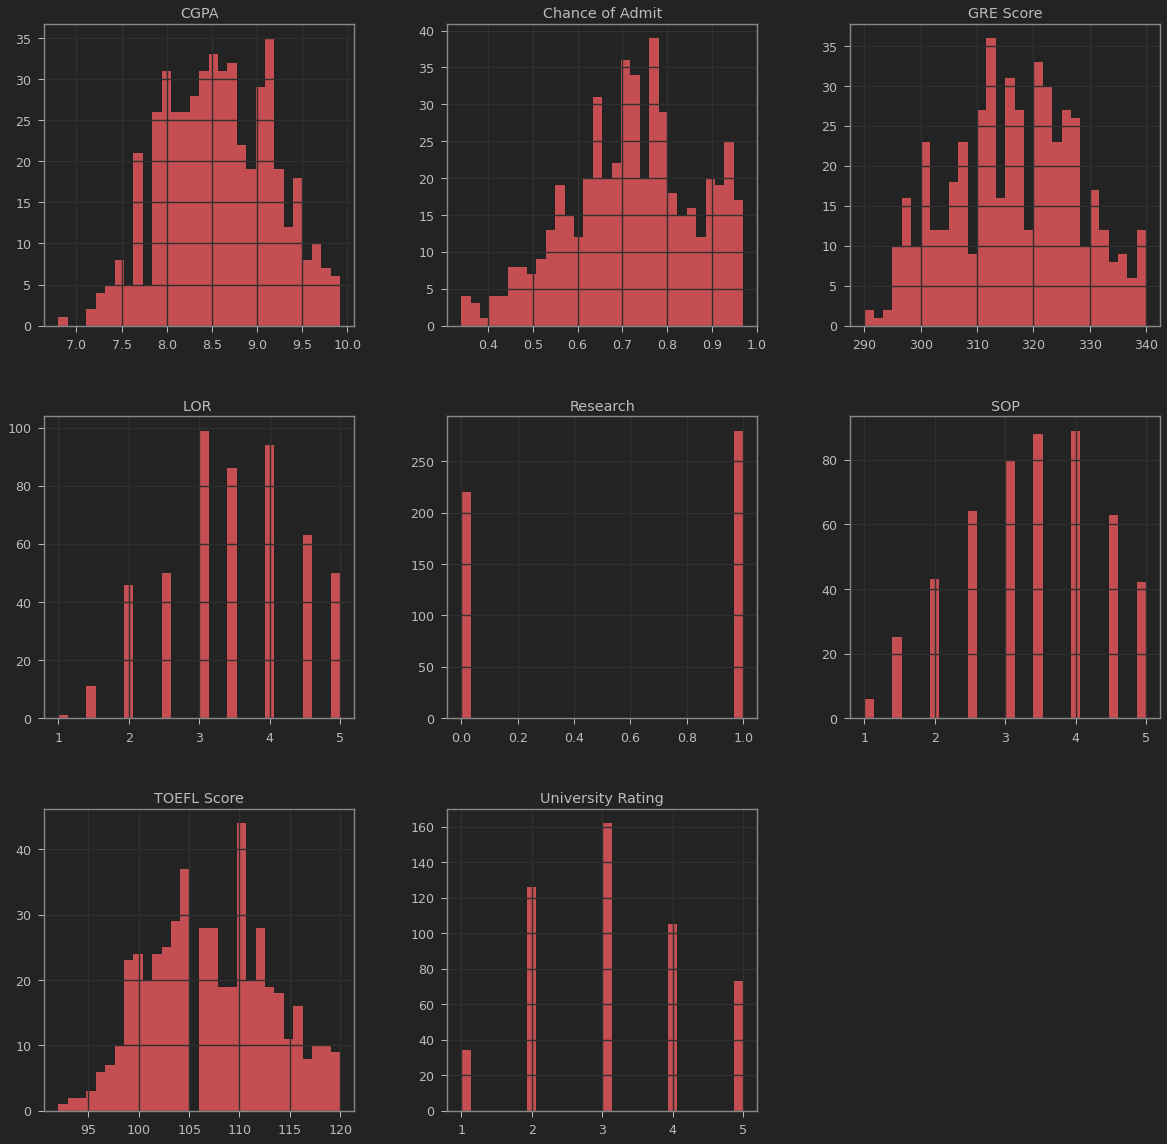

In [11]:
admission_df.hist(bins=30, figsize=(20,20),color='r')

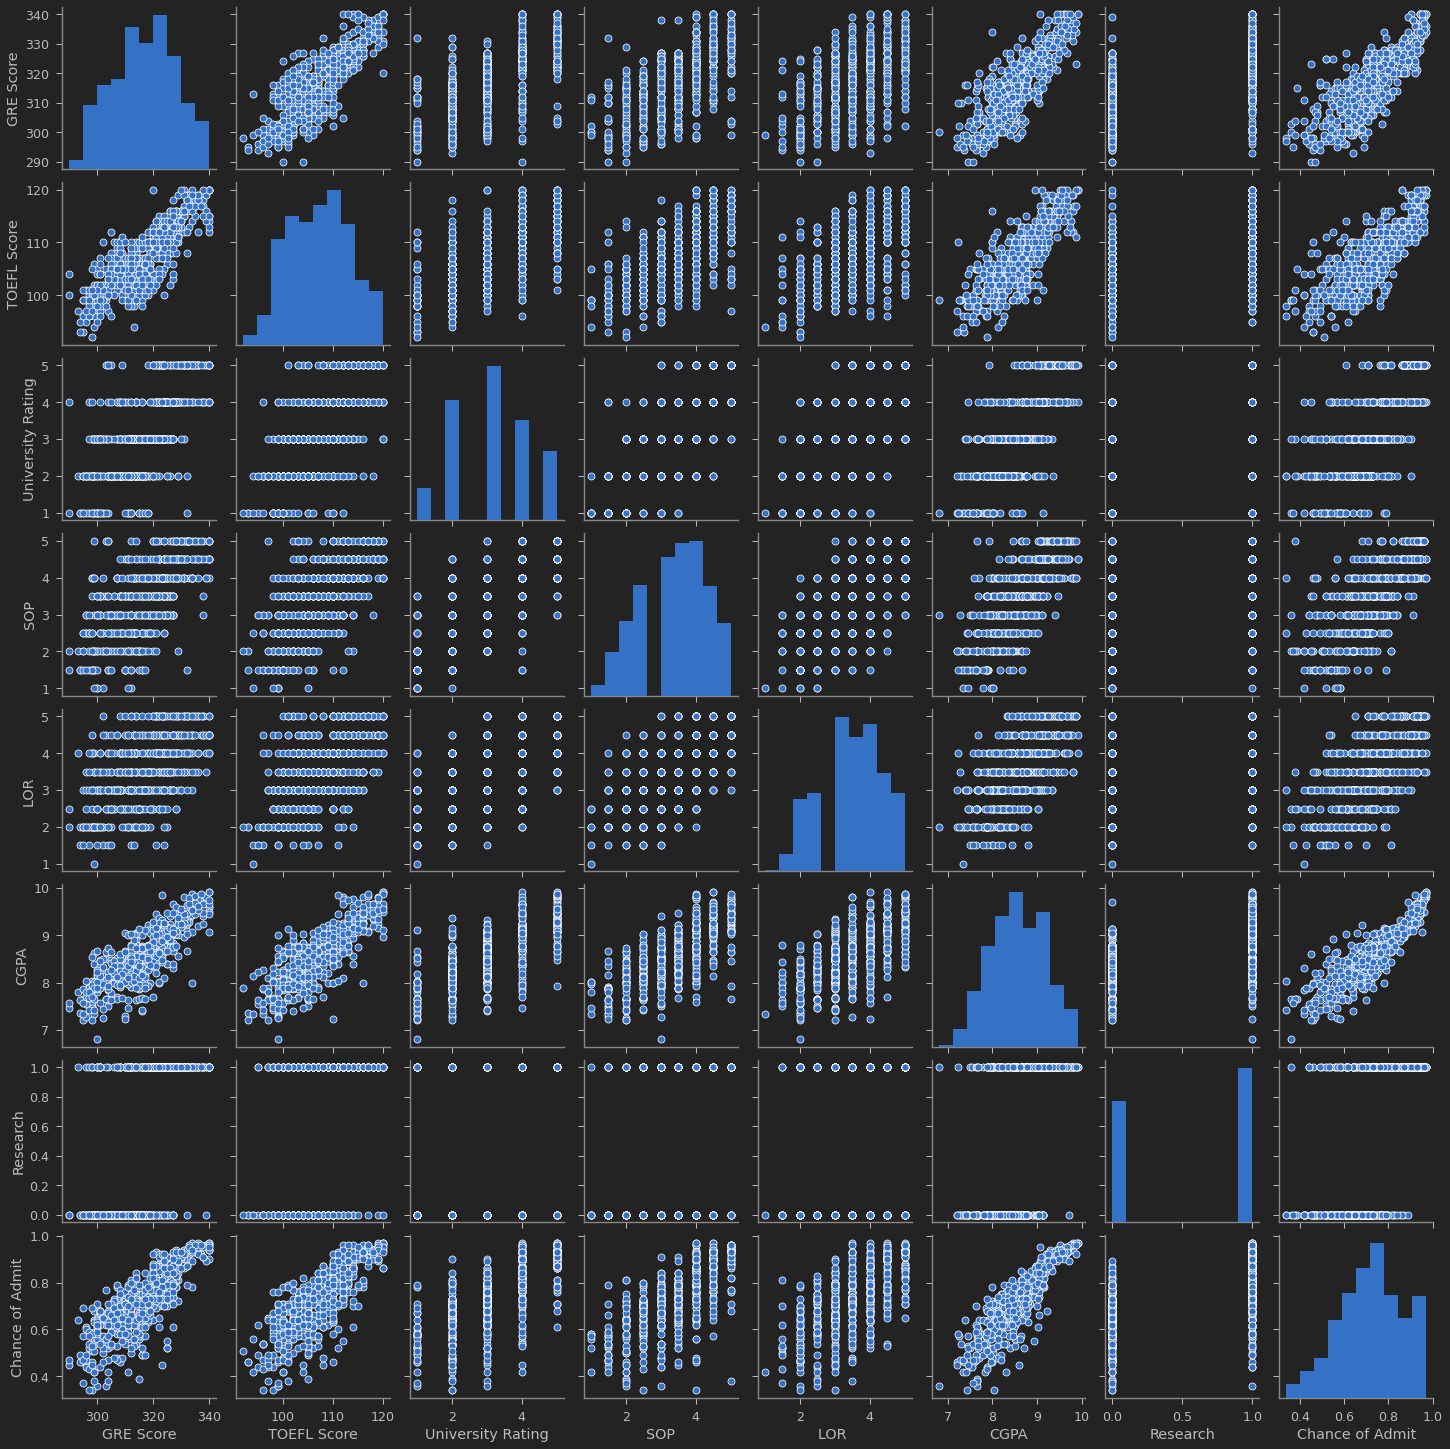

In [12]:
sns.pairplot(admission_df) #Pair plot for the data w.r.t. Chance of Admission

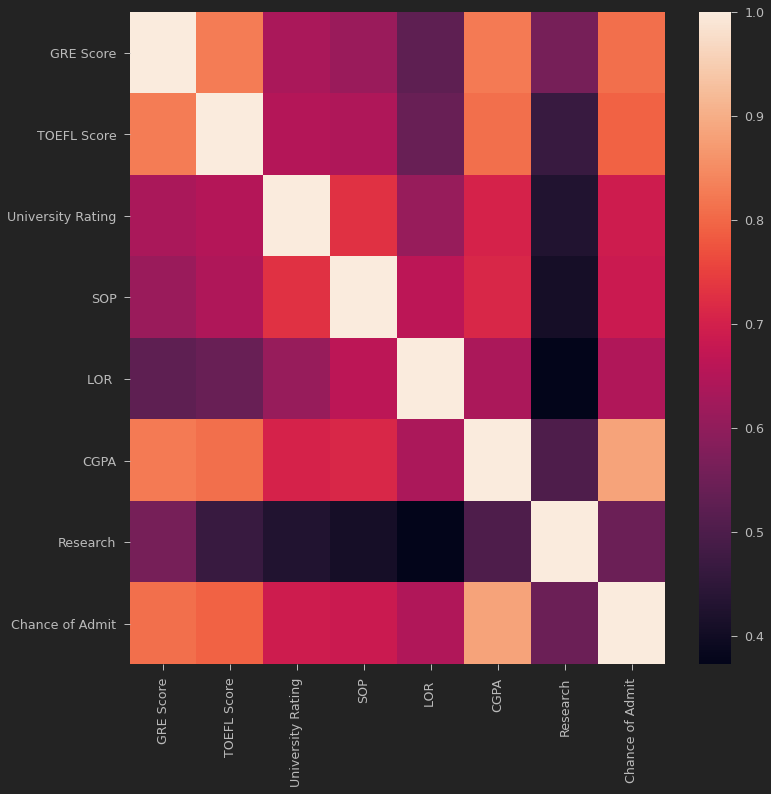

In [13]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix)
  

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [14]:
X=admission_df.drop(columns=['Chance of Admit'])

In [15]:
y=admission_df['Chance of Admit']

In [16]:
X.shape

(500, 7)

In [17]:
y.shape

(500,)

In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
y=y.reshape(-1,1)
y.shape

(500, 1)

In [21]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
#removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
scaler_x=StandardScaler() #MinMaxScaler
X=scaler_x.fit_transform(X)
print(X.mean(axis = 0))
print(X.std(axis = 0))

[ 1.76214598e-15  1.13686838e-15  1.42108547e-16 -8.52651283e-17
  4.26325641e-17  3.11928261e-15 -7.81597009e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [22]:
scaler_y=StandardScaler() #MinMaxScaler
y=scaler_y.fit_transform(y)
print(y.mean(axis = 0))
print(y.std(axis = 0))

[-3.30402372e-16]
[1.]


In [23]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

![image.png](img/Task6.png)

![image.png](img/Task6_1.png)

![image.png](img/Task6_2.png)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [25]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8457670337195369

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

![image.png](img/ANN.png)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.optimizers import Adam
# ** For tensoflow 2.0** #
# from tensorflow.keras.layers import Dense, Activation, Dropout
# from tensorflow.keras.optimizers import Adam


In [28]:
ANN_model = keras.Sequential()

ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [29]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [30]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 14ms/step - loss: 0.6185 - val_loss: 0.2474
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3546 - val_loss: 0.2288
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3394 - val_loss: 0.2368
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2870 - val_loss: 0.2381
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2599 - val_loss: 0.2331
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2362 - val_loss: 0.2410
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2517 - val_loss: 0.2289
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2768 - val_loss: 0.2254
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2654 - val_loss: 0.2744
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2205 - val_loss: 0.2367
Epoch 11

In [31]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.1587
Accuracy : 0.8413169234991074


In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

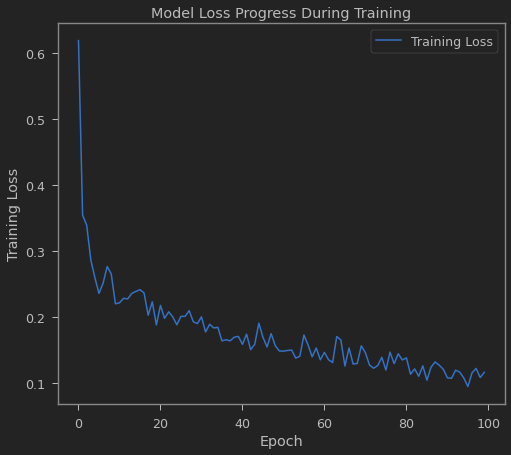

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: 
# <b>EXERCISE::</b> UNDERSTAND AND IMPLEMENT VARIOUS REGRESSION KPIs (Key Performance Indicator)<br/>
# 1. Mean absolute error (MAE)<br/>
# 2. Mean squared error (MSE)<br/>
# 3. Root mean square error (RMSE)<br/>
# 4. R<sup>2</sup><br/>
# 5. Adjusted R<sup>2</sup><br/>

![image.png](img/kpi.png)

![image.png](img/MAE.png)

![image.png](img/MSE.png)

![image.png](img/RMSE.png)

![image.png](img/R2.png)

![image.png](img/R2_1.png)

![image.png](img/R2_2.png)

![image.png](img/R2_3.png)

# TASK #10: CALCULATE REGRESSION MODEL KPIs

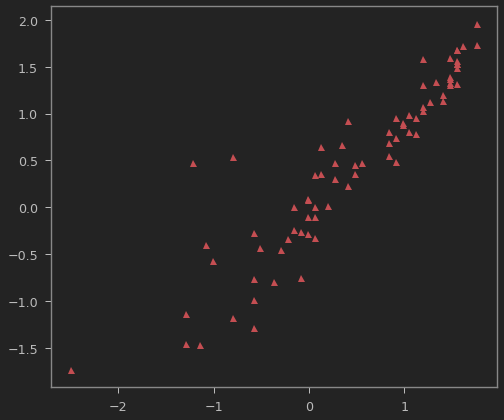

In [34]:
y_predict=LinearRegression_model.predict(X_test)
plt.plot(y_test,y_predict,'^', color='r')

In [35]:
y_predict_original=scaler_y.inverse_transform(y_predict)
y_test_original=scaler_y.inverse_transform(y_test)

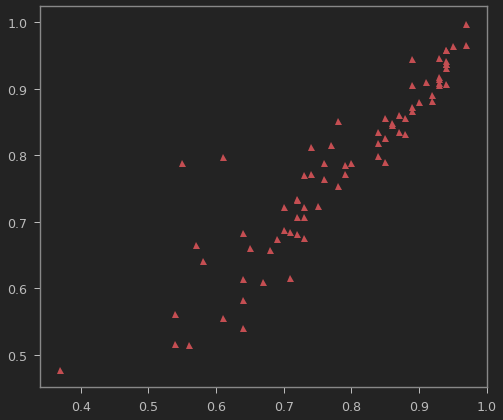

In [36]:
plt.plot(y_test_original,y_predict_original,'^',color='r')

In [37]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
# START CODE#

# calculate Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)

# calculate Mean Squared Error
MSE = mean_squared_error(y_test,y_predict)

# calculate Root Mean Squared Error
RMSE = sqrt(MSE)

# calculate R2 score
r2 = r2_score(y_test, y_predict)

#calculate adjusted R2 score
adj_r2 =  1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

# END CODE#

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.36512930540410404 
MSE = 0.13331940966488348 
MAE = 0.24473449202624872 
R2 = 0.8457670337195369 
Adjusted R2 = 0.8435726622480668


In [42]:
# let's verify this KPI values

import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train_2)
est2 = est.fit()

print("summary()\n",est2.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     254.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):          4.80e-146
Time:                        14:35:32   Log-Likelihood:                -246.30
No. Observations:                 425   AIC:                             508.6
Df Residuals:                     417   BIC:                             541.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.021     -0.0

---